In [1]:
import pandas as pd
path = '/rds/general/user/ms2524/home/amexproject/parquet_files/train/train_'
base_cba = pd.read_parquet(path + "base.parquet", columns=['case_id','WEEK_NUM','target', 'date_decision'])

In [2]:
import pandas as pd

def missing_value_percentages(df):
    missing_percent = df.isnull().mean() * 100
    return missing_percent.sort_values(ascending=False)
def detect_high_cardinality(df, threshold=50):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    high_card = [col for col in cat_cols if df[col].nunique() > threshold]
    return high_card

# Debitcard, Deposit and other table

In [ ]:
debitcard_1 = pd.read_parquet(path +'debitcard_1.parquet')
deposit_1 = pd.read_parquet(path +'deposit_1.parquet')
other_1 = pd.read_parquet(path +'other_1.parquet')

### Not all ids appear in these tables, its a small subset of ids so is it worth using these tables

In [ ]:
d26e4fd7f3cc467aa76806aa9f999b42

# Deposit

In [ ]:
deposit_1["case_id"].nunique()

105111

In [ ]:
deposit_1

,case_id,amount_416A,contractenddate_991D,num_group1,openingdate_313D
0,225,0.00000,NaT,0,2016-08-16
1,331,260.37400,2018-03-18,0,2015-03-19
2,358,0.00000,NaT,0,2014-09-02
3,390,203.60200,2017-09-30,1,2015-10-01
4,390,223.68001,NaT,2,2016-06-08
...,...,...,...,...,...
145081,2703430,0.00000,NaT,7,2016-02-25
145082,2703430,22918.00600,NaT,8,2016-11-26
145083,2703439,219.98401,NaT,0,2016-11-25
145084,2703453,0.00000,NaT,0,2014-08-18


In [ ]:
import pandas as pd

def process_deposit_accounts(df):
    df['contractenddate_991D'] = pd.to_datetime(df['contractenddate_991D'], errors='coerce')
    def custom_agg(group):
        total_amount = group['amount_416A'].sum()
        contract_closed_flag = int(group['contractenddate_991D'].notna().all())
        return pd.Series({
            'amount_416A': total_amount,
            'is_closed': contract_closed_flag
        })

    result = df.groupby('case_id').apply(custom_agg).reset_index()
    return result
process_deposit_accounts(deposit_1)

,case_id,amount_416A,is_closed
0,225,0.00000,0.0
1,331,260.37400,1.0
2,358,0.00000,0.0
3,390,212175.81201,0.0
4,445,23735.93800,0.0
...,...,...,...
105106,2703426,1181.73610,1.0
105107,2703427,250.76399,1.0
105108,2703430,22918.00600,0.0
105109,2703439,219.98401,0.0


# Debitcard

In [ ]:
debitcard_1["case_id"].nunique()

111772

In [ ]:
debitcard_1[debitcard_1["openingdate_857D"].isnull()]

,case_id,last180dayaveragebalance_704A,last180dayturnover_1134A,last30dayturnover_651A,num_group1,openingdate_857D
35,1661,NaN,NaN,NaN,0,None
36,1661,NaN,NaN,NaN,1,None
37,1661,NaN,NaN,NaN,2,None
38,1661,NaN,NaN,NaN,3,None
43,1887,NaN,NaN,NaN,0,None
...,...,...,...,...,...,...
157242,2703197,1.880000,12607.4,0.0,0,None
157246,2703220,0.000000,23800.0,0.0,0,None
157254,2703297,0.000000,71000.0,0.0,0,None
157261,2703329,0.633334,29997.0,0.0,0,None


In [ ]:
missing_value_percentages(debitcard_1)

last30dayturnover_651A           92.955589
last180dayturnover_1134A         92.955589
last180dayaveragebalance_704A    92.234047
openingdate_857D                  8.080635
case_id                           0.000000
num_group1                        0.000000
dtype: float64

### We will drop the time feature 'openingdate_857D' and aggregate the remaining feaatures across ids.

In [ ]:
debitcard_1.drop(columns='num_group1').groupby('case_id', as_index=False).sum(numeric_only=True)

,case_id,last180dayaveragebalance_704A,last180dayturnover_1134A,last30dayturnover_651A
0,225,0.0,0.0,0.0
1,331,0.0,0.0,0.0
2,358,0.0,0.0,0.0
3,390,0.0,0.0,0.0
4,445,0.0,0.0,0.0
...,...,...,...,...
111767,2703426,0.0,0.0,0.0
111768,2703427,0.0,0.0,0.0
111769,2703430,0.0,0.0,0.0
111770,2703439,0.0,0.0,0.0


## Other

In [ ]:
other_1["case_id"].nunique()

51109

In [ ]:
other_1.drop(columns='num_group1').groupby('case_id', as_index=False).sum(numeric_only=True)


,case_id,amtdebitincoming_4809443A,amtdebitoutgoing_4809440A,amtdepositbalance_4809441A,amtdepositincoming_4809444A,amtdepositoutgoing_4809442A
0,43801,12466.6010,12291.2000,914.2000,0.0,304.80002
1,43991,3333.4001,3273.4001,0.0000,0.0,0.00000
2,44001,10000.0000,10000.0000,0.0000,0.0,0.00000
3,44053,0.0000,0.0000,2586.4001,0.0,88.80000
4,44130,63.8000,60.8000,0.0000,0.0,0.00000
...,...,...,...,...,...,...
51104,2703443,344.6000,343.4000,0.0000,0.0,0.00000
51105,2703448,0.0000,0.0000,2184.2000,0.0,18.00000
51106,2703450,0.0000,0.0000,0.0000,0.0,0.00000
51107,2703451,27500.0000,27477.6000,0.0000,0.0,0.00000


# Person

In [ ]:
person_1 = pd.read_parquet(path +'person_1.parquet')
person_2 = pd.read_parquet(path +'person_2.parquet')

In [ ]:
person_1

,case_id,birth_259D,birthdate_87D,childnum_185L,contaddr_district_15M,contaddr_matchlist_1032L,contaddr_smempladdr_334L,contaddr_zipcode_807M,educatesi_927M,empl_employedfrom_271D,...,registaddr_district_1083M,registaddr_zipcode_184M,relatesishiptoclient_415T,relatesishiptoclient_642T,remitter_829L,role_1084L,role_993L,safeguarantyflag_411L,sex_738L,type_25L
0,0,1986-07-01,None,NaN,P88_18_84,False,False,P167_100_165,P97_36_170,2017-09-15,...,P88_18_84,P167_100_165,None,None,None,CL,None,True,F,PRIMARY_MOBILE
1,0,None,None,NaN,a55475b1,None,None,a55475b1,a55475b1,None,...,a55475b1,a55475b1,SPOUSE,None,False,EM,None,None,None,PHONE
2,0,None,None,NaN,a55475b1,None,None,a55475b1,a55475b1,None,...,a55475b1,a55475b1,COLLEAGUE,SPOUSE,False,PE,None,None,None,PHONE
3,0,None,None,NaN,a55475b1,None,None,a55475b1,a55475b1,None,...,a55475b1,a55475b1,None,COLLEAGUE,None,PE,None,None,None,PHONE
4,1,1957-08-01,None,NaN,P103_93_94,False,False,P176_37_166,P97_36_170,2008-10-29,...,P103_93_94,P176_37_166,None,None,None,CL,None,True,M,PRIMARY_MOBILE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973986,2703451,None,None,NaN,a55475b1,None,None,a55475b1,a55475b1,None,...,a55475b1,a55475b1,None,None,None,CL,None,None,None,HOME_PHONE
2973987,2703452,1977-08-01,None,NaN,P133_44_167,False,False,P59_150_74,a55475b1,None,...,P19_11_176,P11_15_81,None,None,None,CL,None,False,M,PRIMARY_MOBILE
2973988,2703453,1950-02-01,None,NaN,P123_6_84,False,False,P46_103_143,a55475b1,None,...,P123_6_84,P46_103_143,None,None,None,CL,None,False,F,PRIMARY_MOBILE
2973989,2703453,None,None,NaN,a55475b1,None,None,a55475b1,a55475b1,None,...,a55475b1,a55475b1,None,None,None,CL,None,None,None,HOME_PHONE


In [ ]:
missing_value_percentages(person_2)

empls_employedfrom_796D     99.649692
relatedperssis_role_762T    98.252049
addres_role_871L            95.882099
addres_district_368M         0.000000
case_id                      0.000000
conts_role_79M               0.000000
addres_zip_823M              0.000000
empls_economicalst_849M      0.000000
empls_employer_name_740M     0.000000
num_group1                   0.000000
num_group2                   0.000000
dtype: float64

In [ ]:
person_1["case_id"].nunique()

1526659

In [ ]:
person_1[person_1["num_group1"]==0]["familystate_447L"].value_counts(dropna=False)

In [ ]:
missing_value_percentages(person_1[person_1["num_group1"]==0])

childnum_185L                100.000000
relatesishiptoclient_642T    100.000000
remitter_829L                100.000000
relatesishiptoclient_415T    100.000000
housingtype_772L             100.000000
maritalst_703L                99.999934
gender_992L                   99.183970
isreference_387L              99.183970
birthdate_87D                 99.183970
role_993L                     99.183970
housetype_905L                93.396168
empl_industry_691L            65.792230
empl_employedtotal_800L       65.394040
empl_employedfrom_271D        62.879661
familystate_447L              52.274018
contaddr_smempladdr_334L       0.028887
contaddr_matchlist_1032L       0.028887
safeguarantyflag_411L          0.000131
contaddr_district_15M          0.000000
case_id                        0.000000
birth_259D                     0.000000
language1_981M                 0.000000
incometype_1044T               0.000000
empladdr_zipcode_114M          0.000000
empladdr_district_926M         0.000000


In [ ]:
detect_high_cardinality(person_1[person_1["num_group1"]==0])

['birth_259D',
 'birthdate_87D',
 'contaddr_district_15M',
 'contaddr_zipcode_807M',
 'empl_employedfrom_271D',
 'empladdr_district_926M',
 'empladdr_zipcode_114M',
 'registaddr_district_1083M',
 'registaddr_zipcode_184M']

In [ ]:
person_1["isreference_387L"].value_counts(dropna=False)

isreference_387L
None     2949075
False      12458
True       12458
Name: count, dtype: int64

In [ ]:
'''
Features to drop 

Feature                      Missing amount

childnum_185L                100.000000
relatesishiptoclient_642T    100.000000
remitter_829L                100.000000
relatesishiptoclient_415T    100.000000
housingtype_772L             100.000000
birthdate_87D                 99.183970 (same as birth_259D)

These features just have one value so theres no value in keeping them:

persontype_792L                0.000000
persontype_1072L               0.000000
personindex_1023L              0.000000
empl_employedfrom_271D        62.879661 - Similar to empl_employedtotal_800L 

'''

Feature                      Missing amount

childnum_185L                100.000000
relatesishiptoclient_642T    100.000000
remitter_829L                100.000000
relatesishiptoclient_415T    100.000000
housingtype_772L             100.000000
maritalst_703L                99.999934 (encode as unkown)
gender_992L                   99.183970 (sex_738L does the same thing)
isreference_387L              99.183970 (encode as unkown)
birthdate_87D                 99.183970 (same as birth_259D)
role_993L                     99.183970 (encode as unkown)
housetype_905L                93.396168 (encode as unkown)

High cardinality features:

empladdr_zipcode_114M          0.000000
empladdr_district_926M         0.000000
contaddr_zipcode_807M          0.000000
registaddr_zipcode_184M        0.000000
registaddr_district_1083M      0.000000


These features just have one value so theres no value in keeping them:

persontype_792L                0.000000
persontype_1072L               0.000000
personindex_1023L              0.000000



empl_industry_691L            65.792230 - High Cardinality
empl_employedtotal_800L       65.394040 - Useful features
empl_employedfrom_271D        62.879661 - Similar to empl_employedtotal_800L 



Selected features:
empl_employedtotal_800L 
familystate_447L
contaddr_smempladdr_334L       0.028887
contaddr_matchlist_1032L       0.028887
safeguarantyflag_411L          0.000131
birth_259D                     0.000000 convert to age
language1_981M                 0.000000
incometype_1044T               0.000000
educatesi_927M                 0.000000
mainoccupatesiinc_384A         0.000000
role_1084L                     0.000000
sex_738L                       0.000000
type_25L                       0.000000

In [ ]:
missing_value_percentages(person_2[person_2["num_group1"]==0])

empls_employedfrom_796D     99.999932
relatedperssis_role_762T    99.999932
addres_role_871L            98.859917
addres_district_368M         0.000000
case_id                      0.000000
conts_role_79M               0.000000
addres_zip_823M              0.000000
empls_economicalst_849M      0.000000
empls_employer_name_740M     0.000000
num_group1                   0.000000
num_group2                   0.000000
dtype: float64

In [ ]:
detect_high_cardinality(person_2[(person_2["num_group1"]==0) & (person_2["num_group2"]==0)])

['addres_district_368M', 'addres_zip_823M']

In [ ]:
person_2["case_id"].nunique()

1435105

In [ ]:
person_1["case_id"].nunique()

1526659

In [ ]:
person_2[person_2["num_group1"]==0]["empls_employer_name_740M"].value_counts(dropna=False)

empls_employer_name_740M
a55475b1      1463927
P207_71_72          1
Name: count, dtype: int64

High cardinality features:
'addres_district_368M', 'addres_zip_823M'

High missing features:
empls_employedfrom_796D     99.999932
relatedpersons_role_762T    99.999932
addres_role_871L            98.859917


Useless features:
empls_employer_name_740M - just 1 value for second category

Features elected:
empls_economicalst_849M
conts_role_79M

# Previous applicatesis

In [ ]:
applprev_1_0 = pd.read_parquet(path +'applprev_1_0.parquet')
applprev_1_1 = pd.read_parquet(path +'applprev_1_1.parquet')
applprev_2 = pd.read_parquet(path + 'applprev_2.parquet')
applprev = pd.concat([applprev_1_0, applprev_1_1])

In [ ]:
missing_value_percentages(applprev[applprev["num_group1"]==0])

credacc_actualbalance_314A     94.641030
credacc_transactesis_402L      94.641030
credacc_status_367L            94.641030
credacc_minhisbal_90A          94.641030
credacc_maxhisbal_375A         94.641030
byoccupatesiinc_3656910L       94.015089
revolvingaccount_394A          90.685063
isdebitcard_527L               86.404666
childnum_21L                   83.165510
dtlastpmt_581D                 77.041101
employedfrom_700D              71.410175
familystate_726L               59.084650
dtlastpmtallstes_3545839D      47.170006
dateactevated_425D             43.019528
maxdpdtolerance_577P           42.240827
approvaldate_319D              38.819604
outstandingdebt_522A           38.689275
currdebt_94A                   38.381462
firstnonzeroinstldate_307D     15.794067
tenor_203L                     11.152808
pmtnum_8L                      11.152808
mainoccupatesiinc_437A          3.433094
annuity_853A                    2.702121
inittransactesicode_279L        2.328161
credamount_590A 

In [ ]:

detect_high_cardinality(applprev)

['approvaldate_319D',
 'cancelreassi_3545846M',
 'createsidate_885D',
 'dateactevated_425D',
 'district_544M',
 'dtlastpmt_581D',
 'dtlastpmtallstes_3545839D',
 'employedfrom_700D',
 'firstnonzeroinstldate_307D',
 'professesi_152M']

In [ ]:
applprev["inittransactesicode_279L"].value_counts(dropna=False)

inittransactesicode_279L
POS     3501653
CASH    2576770
NDF      245358
None     202198
Name: count, dtype: int64

In [ ]:
applprev_2[(applprev_2["num_group1"]==0)&(applprev_2["num_group2"]==0)]

,case_id,cacccardblochreas_147M,conts_type_509L,credacc_cards_status_52L,num_group1,num_group2
0,2,None,PRIMARY_MOBILE,None,0,0
4,3,None,PHONE,None,0,0
7,4,None,PRIMARY_MOBILE,None,0,0
9,5,None,PRIMARY_MOBILE,None,0,0
10,6,None,PRIMARY_MOBILE,None,0,0
...,...,...,...,...,...,...
14075405,2703450,a55475b1,PRIMARY_MOBILE,None,0,0
14075434,2703451,a55475b1,PRIMARY_MOBILE,None,0,0
14075451,2703452,a55475b1,PRIMARY_MOBILE,None,0,0
14075457,2703453,a55475b1,PRIMARY_MOBILE,None,0,0


In [ ]:
"""
Features to drop:

Date features to not be used:

dtlastpmt_581D                 72.791898
dtlastpmtallstes_3545839D      61.961906
employedfrom_700D              59.553946
dateactevated_425D             48.142248
approvaldate_319D              38.819604
firstnonzeroinstldate_307D      9.998224
createsidate_885D               0.000000

Features with high number of missing: (encode with median and mode for num and cat)

revolvingaccount_394A          95.452790
credacc_minhisbal_90A          95.096000
credacc_status_367L            95.096000
credacc_maxhisbal_375A         95.096000
credacc_transactesis_402L      95.096000
credacc_actualbalance_314A     95.096000
isdebitcard_527L               92.905080
byoccupatesiinc_3656910L       76.487083

Features to use:

childnum_21L                   54.542376
maxdpdtolerance_577P           47.436622 (median or mode)
familystate_726L               36.682496 (Categorical unknown)
outstandingdebt_522A           34.604279 (impute both debts as 0?)
currdebt_94A                   34.424138 (impute both debts as 0?)
tenor_203L                      8.455743
pmtnum_8L                       8.455743 (0 most common use median or mode) this is the same as tenor it seems
annuity_853A                    3.842121
credamount_590A                 3.098355
credtype_587L                   3.098355
downpmt_134A                    3.098355
inittransactesicode_279L        3.098355
credacc_credlmt_575A            2.974757
mainoccupatesiinc_437A          1.562723
actualdpd_943P                  0.038308 (0 most common)
status_219L                     0.000000
isbidproduct_390L               0.000000

cancelreason_3545846M           0.000000 
district_544M                   0.000000
educatesi_1138M                 0.000000
rejectreason_755M               0.000000
professesi_152M                 0.000000
postype_4733339M                0.000000
rejectreasonclient_4145042M     0.000000

"""

In [ ]:
applprev_2[(applprev_2["num_group1"]==0)&(applprev_2["num_group2"]==0)]["credacc_cards_status_52L"].value_counts(dropna=False)

credacc_cards_status_52L
None           1156883
CANCELLED        37144
ACTIVE           15808
INACTIVE         11331
BLOCKED            293
RENEWED             59
UNCONFIRMED          4
Name: count, dtype: int64

In [ ]:
applprev_2['credacc_cards_status_52L'].unique()


array([None, 'CANCELLED', 'INACTIVE', 'ACTIVE', 'BLOCKED', 'RENEWED',
       'UNCONFIRMED'], dtype=object)

In [ ]:
applprev_2

,case_id,cacccardblochreas_147M,conts_type_509L,credacc_cards_status_52L,num_group1,num_group2
0,2,None,PRIMARY_MOBILE,None,0,0
1,2,None,EMPLOYMENT_PHONE,None,0,1
2,2,None,PRIMARY_MOBILE,None,1,0
3,2,None,EMPLOYMENT_PHONE,None,1,1
4,3,None,PHONE,None,0,0
...,...,...,...,...,...,...
14075482,2703454,a55475b1,None,None,0,1
14075483,2703454,a55475b1,PRIMARY_MOBILE,None,1,0
14075484,2703454,a55475b1,HOME_PHONE,None,1,1
14075485,2703454,a55475b1,None,None,1,2


In [ ]:
"""
Features:

cacccardblochreas_147M
conts_type_509L
credacc_cards_status_52L
"""

# Static

In [ ]:
static_0_0 =  pd.read_parquet(path +'static_0_0.parquet')
static_0_1 = pd.read_parquet(path +'static_0_1.parquet')

static = pd.concat([static_0_0, static_0_1])

In [13]:
missing_value_percentages(static).to_csv("v.csv")


In [ ]:
detect_high_cardinality(static)

['datefirstoffer_1144D',
 'datelastinstal40dpd_247D',
 'datelastunpaid_3546854D',
 'dtlastpmtallstes_4499206D',
 'firstclxcampaigi_1125D',
 'firstdatedue_489D',
 'lastactevateddate_801D',
 'lastapplicatesidate_877D',
 'lastapprcommoditytypec_5251766M',
 'lastapprdate_640D',
 'lastcancelreassi_561M',
 'lastdelinqdate_224D',
 'lastrejectcommodtypec_5251769M',
 'lastrejectdate_50D',
 'lastrepayingdate_696D',
 'maxdpdinstldate_3546855D',
 'payvacatesipostpone_4187118D',
 'previouscontdistrict_112M',
 'validfrom_1069D']

In [ ]:
static["amtinstpaidbefduel24m_4187115A"].value_counts(dropna=False)

amtinstpaidbefduel24m_4187115A
NaN           561124
0.000         161063
800.000           89
6000.000          84
4000.000          79
               ...  
36483.200          1
75629.586          1
154279.610         1
34429.688          1
134850.200         1
Name: count, Length: 610153, dtype: int64

missing:
clientscnt_136L
cardtype_51L
bankacctype_710L
isbidproductrequest_292L
isdebitcard_729L
interestrategrace_34L
inittransactesiamount_650A
equalityempfrom_62L
equalitydataagreement_891L
lastotherinc_902A
lastdependentsnum_448L
totinstallast1m_4525188A
sumoutstandtotalest_4493215A

avgliamtstart24m_4525187A
avgoutstandbalancel6m_4187114A
avgpmtlast12m_4525200A
avgdbdtollast24m_4525197P
avgdbddpdlast3m_4187120P
maxoutstandbalancel12m_4187113A
maxpmtlast3m_4525190A
maxliamtstart6m_4525199A
validfrom_1069D


datelastinstal40dpd_247D
dtlastpmtallstes_4499206D
datelastunpaid_3546854D
lastrepayingdate_696D


In [63]:
static_cb = pd.read_parquet(path + 'static_cb_0.parquet')

In [64]:
static_cb['case_id'].nunique()

1500476

In [ ]:
static["case_id"].nunique()

1526659

# Credit Bureau

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import os
def load_file(i):
    return pd.read_parquet(path + f"credit_bureau_a_2_{i}.parquet")

with ThreadPoolExecutor() as executor:
    dfs = list(executor.map(load_file, range(11)))

credit_bureau_a = pd.concat(dfs, ignore_index=True)


In [ ]:
credit_bureau_a = pd.concat([pd.read_parquet(path +f'credit_bureau_a_2_{id}.parquet') for id in range(11)])

In [11]:
all_chunks = []
for id in range(4):
    df = pd.read_parquet(path + f"credit_bureau_a_1_{id}.parquet")
    df = df[df["num_group1"]==0]
    all_chunks.append(df)

# Concatenate everything at once
credit_bureau_a = pd.concat(all_chunks, ignore_index=True)


In [12]:
credit_bureau_a["case_id"].nunique()

1386273

In [ ]:
credit_bureau_a[credit_bureau_a["num_group1"]==0]["prolongatesicount_599L"].value_counts(dropna=False)

prolongatesicount_599L
NaN     1378452
1.0        3829
0.0        3046
2.0         490
3.0         149
4.0          73
5.0          47
7.0          28
6.0          28
9.0          21
8.0          19
11.0         14
10.0         12
12.0         10
15.0          6
13.0          6
14.0          5
16.0          4
22.0          4
17.0          3
25.0          2
26.0          2
28.0          2
38.0          2
19.0          2
20.0          2
24.0          2
23.0          2
51.0          1
27.0          1
18.0          1
54.0          1
21.0          1
60.0          1
55.0          1
32.0          1
50.0          1
30.0          1
58.0          1
Name: count, dtype: int64

In [ ]:
missing_value_percentages(credit_bureau_a[credit_bureau_a["num_group1"]==0]).to_csv("v.csv")

In [ ]:
detect_high_cardinality(credit_bureau_acredit_bureau_a["num_group1"]==0])

Date features:
overdueamountmax2date_1002D,73.03171886057075
numberofoverdueinstlmaxdat_148D,71.94564129864752
numberofoverdueinstlmaxdat_641D,68.67384707052652
overdueamountmax2date_1142D,68.2556754694061

dateofrealrepmt_138D,27.81479549843357
refreshdate_3813885D,27.103319476033942

lastupdate_388D,26.853008029442975
dateofcredend_353D,26.84925696453729
dateofcredstart_181D,26.84925696453729
lastupdate_1112D,8.819835631221268
dateofcredstart_739D,8.819835631221268
dateofcredend_289D,8.819835631221268

In [4]:
all_chunks = []
for id in range(11):
    df = pd.read_parquet(path + f"credit_bureau_a_2_{id}.parquet")
    df = df[(df['num_group1'] == 0) & (df['num_group2'] == 0)]
    all_chunks.append(df)

# Concatenate everything at once
credit_bureau_a_2 = pd.concat(all_chunks, ignore_index=True)

In [6]:
credit_bureau_a_2["case_id"].nunique()

1385288

In [7]:
missing_value_percentages(credit_bureau_a_2)

pmts_dpd_303P                      96.902377
pmts_overdue_1152A                 96.881731
pmts_dpd_1073P                     93.587182
pmts_overdue_1140A                 93.573105
collater_valueofguarantee_876L     27.336482
pmts_year_507T                     26.822148
pmts_month_706T                    26.822148
collater_valueofguarantee_1124L     8.810370
pmts_month_158T                     8.755003
pmts_year_1139T                     8.755003
case_id                             0.000000
collater_typofvalofguarant_407M     0.000000
collater_typofvalofguarant_298M     0.000000
collaterals_typeofguarante_359M     0.000000
collaterals_typeofguarante_669M     0.000000
num_group1                          0.000000
num_group2                          0.000000
subjectroles_name_541M              0.000000
subjectroles_name_838M              0.000000
dtype: float64

There aren't enough IDs in Credit Burerau B to use its data

In [14]:
credit_bureau_b_1 = pd.read_parquet(path + 'credit_bureau_b_1.parquet')
credit_bureau_b_2 = pd.read_parquet(path + 'credit_bureau_b_2.parquet')

In [16]:
credit_bureau_b_1[(credit_bureau_b_1["num_group1"]==0)]

,case_id,amount_1115A,classificationofcontr_1114M,contractdate_551D,contractmaturitydate_151D,contractst_516M,contracttype_653M,credlmt_1052A,credlmt_228A,credlmt_3940954A,...,pmtmethod_731M,pmtnumpending_403L,purposeofcred_722M,residualamount_1093A,residualamount_127A,residualamount_3940956A,subjectrole_326M,subjectrole_43M,totalamount_503A,totalamount_881A
1,467,NaN,ea6782cc,2011-06-15,2031-06-13,7241344e,724be82a,3000000.0,10000.0,3000000.0,...,a55475b1,NaN,96a8fdfe,0.0,0.000,NaN,fa4f56f1,ab3c25cf,3000000.0,10000.0
6,1445,NaN,ea6782cc,2015-01-30,2021-01-30,7241344e,1c9c5356,400000.0,100000.0,74000.0,...,a55475b1,NaN,60c73645,0.0,0.000,73044.180,daf49a8a,ab3c25cf,400000.0,100000.0
9,1934,NaN,01f63ac8,2012-10-08,2022-10-08,54132f86,724be82a,980000.0,79400.0,980000.0,...,a55475b1,NaN,96a8fdfe,0.0,0.000,NaN,fa4f56f1,ab3c25cf,980000.0,79400.0
11,3159,NaN,ea6782cc,2018-11-20,2020-11-20,7241344e,1c9c5356,132000.0,0.0,132000.0,...,a55475b1,NaN,60c73645,0.0,111858.700,111858.700,ab3c25cf,ab3c25cf,132000.0,0.0
12,3208,300000.0,01f63ac8,2016-08-02,2019-08-09,7241344e,4257cbed,NaN,31000.0,NaN,...,dbcbe8f8,8.0,96a8fdfe,0.0,NaN,NaN,ab3c25cf,ab3c25cf,300000.0,31000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85784,2701996,NaN,ea6782cc,2018-05-04,2022-05-04,7241344e,1c9c5356,0.0,NaN,0.0,...,a55475b1,NaN,60c73645,NaN,0.000,0.000,ab3c25cf,ab3c25cf,0.0,388703.4
85785,2702661,21420.0,ea6782cc,2020-05-27,2020-11-27,7241344e,4257cbed,NaN,NaN,NaN,...,f6e26148,2.0,60c73645,NaN,NaN,NaN,ab3c25cf,ab3c25cf,21420.0,281932.8
85787,2703357,NaN,ea6782cc,2018-11-17,2020-11-17,7241344e,1c9c5356,72000.0,68996.0,72000.0,...,a55475b1,NaN,60c73645,0.0,72000.000,72000.000,ab3c25cf,ab3c25cf,72000.0,68996.0
85788,2703377,NaN,ea6782cc,2014-01-04,2022-01-04,7241344e,1c9c5356,0.0,NaN,0.0,...,a55475b1,NaN,60c73645,NaN,0.000,0.000,ab3c25cf,ab3c25cf,0.0,205540.0


In [15]:
credit_bureau_b_2[(credit_bureau_b_2["num_group1"]==0)&(credit_bureau_b_2["num_group2"]==0)]

,case_id,num_group1,num_group2,pmts_date_1107D,pmts_dpdvalue_108P,pmts_pmtsoverdue_635A
0,467,0,0,2018-11-15,NaN,NaN
30,1445,0,0,2016-01-15,0.0,0.0
113,1934,0,0,2018-09-15,NaN,NaN
192,3159,0,0,2018-11-15,0.0,0.0
195,3208,0,0,2017-07-15,0.0,0.0
...,...,...,...,...,...,...
1286564,2701996,0,0,2018-04-15,0.0,0.0
1286594,2702661,0,0,2020-05-15,0.0,0.0
1286599,2703357,0,0,2018-11-15,0.0,0.0
1286653,2703377,0,0,2017-10-15,0.0,0.0


In [17]:
static_cb = pd.read_parquet(path + 'static_cb_0.parquet')

In [20]:
static_cb

,case_id,assignmentdate_238D,assignmentdate_4527235D,assignmentdate_4955616D,birthdate_574D,contractssum_5085716L,dateofbirth_337D,dateofbirth_342D,days120_123L,days180_256L,...,pmtscount_423L,pmtssum_45A,requesttype_4525192L,responsedate_1012D,responsedate_4527233D,responsedate_4917613D,riskassesment_302T,riskassesment_940T,secondquarter_766L,thirdquarter_1082L
0,357,None,None,None,1988-04-01,NaN,None,None,NaN,NaN,...,6.0,6301.4000,None,2019-01-25,None,None,None,NaN,NaN,NaN
1,381,None,None,None,1973-11-01,NaN,None,None,NaN,NaN,...,6.0,4019.6000,None,2019-01-25,None,None,None,NaN,NaN,NaN
2,388,None,None,None,1989-04-01,NaN,1989-04-01,None,6.0,8.0,...,6.0,14548.0000,None,2019-01-28,None,None,None,NaN,3.0,5.0
3,405,None,None,None,1974-03-01,NaN,1974-03-01,None,0.0,0.0,...,6.0,10498.2400,None,2019-01-21,None,None,None,NaN,2.0,0.0
4,409,None,None,None,1993-06-01,NaN,1993-06-01,None,2.0,3.0,...,7.0,6344.8804,None,2019-01-21,None,None,None,NaN,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500471,2703450,None,None,2018-01-11,None,52863.59,1960-01-01,None,0.0,0.0,...,NaN,NaN,None,None,None,2020-10-19,None,NaN,1.0,1.0
1500472,2703451,None,None,2005-06-15,None,324608.52,1950-11-01,None,0.0,0.0,...,NaN,NaN,None,None,None,2020-10-19,None,NaN,1.0,2.0
1500473,2703452,None,None,None,None,102738.76,1977-08-01,None,2.0,2.0,...,NaN,NaN,None,None,None,2020-10-19,None,NaN,0.0,4.0
1500474,2703453,None,None,2008-02-15,None,212683.29,1950-02-01,None,2.0,2.0,...,NaN,NaN,None,None,None,2020-10-17,None,NaN,2.0,1.0


In [21]:
missing_value_percentages(static_cb)

dateofbirth_342D           97.567439
formonth_118L              97.566506
for3years_584L             97.566506
for3years_504L             97.566506
for3years_128L             97.566506
forweek_528L               97.566506
forweek_1077L              97.566506
fortoday_1092L             97.566506
forquarter_634L            97.566506
foryear_850L               97.566506
foryear_818L               97.566506
foryear_618L               97.566506
forweek_601L               97.566506
forquarter_462L            97.566506
forquarter_1017L           97.566506
formonth_535L              97.566506
formonth_206L              97.566506
riskassesment_302T         96.430533
riskassesment_940T         96.430466
assignmentdate_4955616D    95.225982
pmtcount_4955617L          95.211853
pmtaverage_4955615A        95.211853
pmtcount_4527229L          92.337232
assignmentdate_4527235D    92.337232
pmtaverage_4527227A        92.337232
assignmentdate_238D        90.869831
pmtaverage_3A              90.430437
p

In [25]:
static_cb[~static_cb["riskassesment_302T"].isnull()]["riskassesment_302T"]

79          59% - 66%
139           6% - 8%
172           1% - 1%
187           2% - 3%
189        67% - 100%
              ...    
1499058       4% - 6%
1499723       2% - 3%
1500386     50% - 58%
1500404       1% - 1%
1500458      8% - 11%
Name: riskassesment_302T, Length: 53559, dtype: object

In [32]:
static_cb["for3years_128L"].value_counts()

for3years_128L
0.0    36511
1.0        3
Name: count, dtype: int64

In [3]:
tax_registry_a = pd.read_parquet(path + 'tax_registry_a_1.parquet')
tax_registry_b = pd.read_parquet(path + 'tax_registry_b_1.parquet')
tax_registry_c = pd.read_parquet(path + 'tax_registry_c_1.parquet')

# Feature importance

## Person

In [ ]:
"""
 
 childnum_185L                100.000000
relatesishiptoclient_642T    100.000000
remitter_829L                100.000000
relatesishiptoclient_415T    100.000000
housingtype_772L             100.000000
birthdate_87D                 99.183970 (same as birth_259D)

These features just have one value so theres no value in keeping them:

persontype_792L                0.000000
persontype_1072L               0.000000
personindex_1023L              0.000000
empl_employedfrom_271D        62.879661 - Similar to empl_employedtotal_800L """

In [1]:
import pandas as pd
path = '/rds/general/user/ms2524/home/amexproject/parquet_files/train/train_'
base_cba = pd.read_parquet(path + "base.parquet", columns=['case_id','WEEK_NUM','target', 'date_decision'])

person_1 = pd.read_parquet(path +'person_1.parquet')
person_2 = pd.read_parquet(path +'person_2.parquet')

person_1 = person_1[person_1["num_group1"]==0].drop(columns="num_group1")
person_2 = person_2[(person_2["num_group1"]==0)&(person_2["num_group2"]==0)].drop(columns=["num_group1", "num_group2"])

In [ ]:
person_drop = [
    "childnum_185L",
    "relationshiptoclient_642T",
    "remitter_829L",
    "relationshiptoclient_415T",
    "housingtype_772L",
    "birthdate_87D",           # Same as birth_259D
    "persontype_792L",         # Only one value
    "persontype_1072L",        # Only one value
    "personindex_1023L",       # Only one value
    "empl_employedfrom_271D",   # Similar to empl_employedtotal_800L,
     "empls_employedfrom_796D"
]

In [3]:
person = pd.merge(
    pd.merge(base_cba, person_1, how="left", on="case_id"),
    person_2,
    how="left",
    on="case_id",
    suffixes=("_p1", "_p2")
)
person = person.drop(columns=person_drop)

## Previous application

In [4]:
applprev_1_0 = pd.read_parquet(path +'applprev_1_0.parquet')
applprev_1_1 = pd.read_parquet(path +'applprev_1_1.parquet')
applprev2 = pd.read_parquet(path + 'applprev_2.parquet')
applprev1 = pd.concat([applprev_1_0, applprev_1_1])

In [5]:
applprev1 = applprev1[applprev1["num_group1"]==0].drop(columns="num_group1")
applprev2 = applprev2[(applprev2["num_group1"]==0)&(applprev2["num_group2"]==0)].drop(columns=["num_group1", "num_group2"])

In [6]:
applprev = pd.merge(
    pd.merge(base_cba, applprev1, how="left", on="case_id"),
    applprev2,
    how="left",
    on="case_id"
)

In [7]:
applprev_drop = ['approvaldate_319D', 'creationdate_885D', 'dateactivated_425D', 'dtlastpmt_581D', 'dtlastpmtallstes_3545839D', 'employedfrom_700D', 'firstnonzeroinstldate_307D']

In [8]:
applprev = applprev.drop(columns=applprev_drop)

## Static

In [9]:
static_0_0 =  pd.read_parquet(path +'static_0_0.parquet')
static_0_1 = pd.read_parquet(path +'static_0_1.parquet')

static = pd.concat([static_0_0, static_0_1])

In [10]:
static = pd.merge(base_cba, static, how="inner", on="case_id")

In [11]:
static_drop = ['datefirstoffer_1144D', 'datelastinstal40dpd_247D', 'datelastunpaid_3546854D', 'dtlastpmtallstes_4499206D', 
               'firstclxcampaign_1125D', 'firstdatedue_489D', 'lastactivateddate_801D', 'lastapplicationdate_877D', 'lastapprdate_640D', 'lastdelinqdate_224D', 
               'lastrejectdate_50D', 'lastrepayingdate_696D', 'maxdpdinstldate_3546855D', 'payvacationpostpone_4187118D', 'validfrom_1069D']

In [12]:
static = static.drop(columns=static_drop)

# Credit Bureau

In [13]:
all_chunks = []
for id in range(4):
    df = pd.read_parquet(path + f"credit_bureau_a_1_{id}.parquet")
    df = df[df["num_group1"]==0].drop(columns="num_group1")
    all_chunks.append(df)

# Concatenate everything at once
credit_bureau_a_1 = pd.concat(all_chunks, ignore_index=True)
del all_chunks
del df

In [14]:
all_chunks = []
for id in range(11):
    df = pd.read_parquet(path + f"credit_bureau_a_2_{id}.parquet")
    df = df[(df['num_group1'] == 0) & (df['num_group2'] == 0)].drop(columns=["num_group1", "num_group2"])
    all_chunks.append(df)

# Concatenate everything at once
credit_bureau_a_2 = pd.concat(all_chunks, ignore_index=True)
del all_chunks
del df

In [15]:
cb_drop1 = ['dateofcredend_289D', 'dateofcredend_353D', 'dateofcredstart_181D', 'dateofcredstart_739D', 'dateofrealrepmt_138D', 'lastupdate_1112D', 'lastupdate_388D', 'numberofoverdueinstlmaxdat_148D', 
            'numberofoverdueinstlmaxdat_641D', 'overdueamountmax2date_1002D', 'overdueamountmax2date_1142D', 'refreshdate_3813885D']

In [16]:
credit_bureau_a_1 = credit_bureau_a_1.drop(columns=cb_drop1)

In [17]:
cb = pd.merge(
    pd.merge(base_cba, credit_bureau_a_1, how="left", on="case_id"),
    credit_bureau_a_2,
    how="left",
    on="case_id"
)


# Static Crdit bureau

In [18]:
static_cb = pd.read_parquet(path + 'static_cb_0.parquet')

In [19]:
scb_drop = ['assignmentdate_238D', 'assignmentdate_4527235D', 'assignmentdate_4955616D', 'birthdate_574D', 'dateofbirth_337D', 'dateofbirth_342D', 'responsedate_1012D', 'responsedate_4527233D', 'responsedate_4917613D']

In [20]:
static_cb = static_cb.drop(columns=scb_drop)
static_cb = pd.merge(base_cba, static_cb, how="left", on="case_id")

# Processing data type

In [21]:
import pandas as pd

def convert_columns(df):
    skip_cols = {'case_id', 'WEEK_NUM', 'target'}

    for col in df.columns:
        if col in skip_cols:
            continue  # Skip special columns

        col_upper = col.upper()  # Case-insensitive suffix check
        
        # Rule 1: Ends with 'P' → Int64
        if col_upper.endswith('P'):
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
        
        # Rule 2: Ends with 'A' → float64
        elif col_upper.endswith('A'):
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')
        
        # Rule 3: Ends with 'D' → datetime
        elif col_upper.endswith('D'):
            df[col] = pd.to_datetime(df[col], errors='coerce')
        
        # Rule 4 & 5: object dtype or ends with 'M' → category with 'Unknown'
        elif df[col].dtype == 'object' or col_upper.endswith('M'):
            df[col] = df[col].fillna('Unknown').astype('category')
    
    return df


In [22]:
person = convert_columns(person)

In [23]:
applprev = convert_columns(applprev)

In [24]:
cb = convert_columns(cb)

In [25]:
static = convert_columns(static)

In [26]:
static_cb = convert_columns(static_cb)

In [27]:
# Columns to drop if present
drop_cols = ['WEEK_NUM', 'target', 'date_decision']

# Drop columns conditionally
person_clean = person.drop(columns=[col for col in drop_cols if col in person.columns])
applprev_clean = applprev.drop(columns=[col for col in drop_cols if col in applprev.columns])
cb_clean = cb
static_cb_clean = static_cb.drop(columns=[col for col in drop_cols if col in static_cb.columns])
static_clean = static.drop(columns=[col for col in drop_cols if col in static.columns])

# Merge all dataframes on 'case_id'
merged = cb_clean.merge(static_cb_clean, on="case_id", how="inner") \
                 .merge(person_clean, on="case_id", how="inner") \
                 .merge(applprev_clean, on="case_id", how="inner") \
                 .merge(static_clean, on="case_id", how="inner")


In [28]:
# Ensure both columns are in datetime format
merged["birth_259D"] = pd.to_datetime(merged["birth_259D"], errors='coerce')
merged["date_decision"] = merged["date_decision"].astype("datetime64[ns]")

# Calculate age in years at the time of decision
merged["age_at_decision"] = (merged["date_decision"] - merged["birth_259D"]).dt.days // 365

# Drop the original columns
merged.drop(columns=["birth_259D", "date_decision"], inplace=True)


In [29]:
bool_cols = merged.select_dtypes(include='bool').columns.tolist()
for col in bool_cols:
    merged[col] = merged[col].astype('category')


In [30]:
categorical_cols = merged.select_dtypes(include='category').columns.tolist()

In [31]:
import os
print(os.uname().nodename)


cx3-2-11.cx3.hpc.ic.ac.uk


[0]	validation-logloss:0.13122
[1]	validation-logloss:0.12813
[2]	validation-logloss:0.12612
[3]	validation-logloss:0.12460
[4]	validation-logloss:0.12341
[5]	validation-logloss:0.12247
[6]	validation-logloss:0.12190
[7]	validation-logloss:0.12129
[8]	validation-logloss:0.12094
[9]	validation-logloss:0.12049
[10]	validation-logloss:0.12025
[11]	validation-logloss:0.12003
[12]	validation-logloss:0.11998
[13]	validation-logloss:0.11979
[14]	validation-logloss:0.11958
[15]	validation-logloss:0.11944
[16]	validation-logloss:0.11934
[17]	validation-logloss:0.11916
[18]	validation-logloss:0.11901
[19]	validation-logloss:0.11904
[20]	validation-logloss:0.11899
[21]	validation-logloss:0.11892
[22]	validation-logloss:0.11890
[23]	validation-logloss:0.11892
[24]	validation-logloss:0.11888
[25]	validation-logloss:0.11885
[26]	validation-logloss:0.11882
[27]	validation-logloss:0.11877
[28]	validation-logloss:0.11870
[29]	validation-logloss:0.11867
[30]	validation-logloss:0.11859
[31]	validation-lo

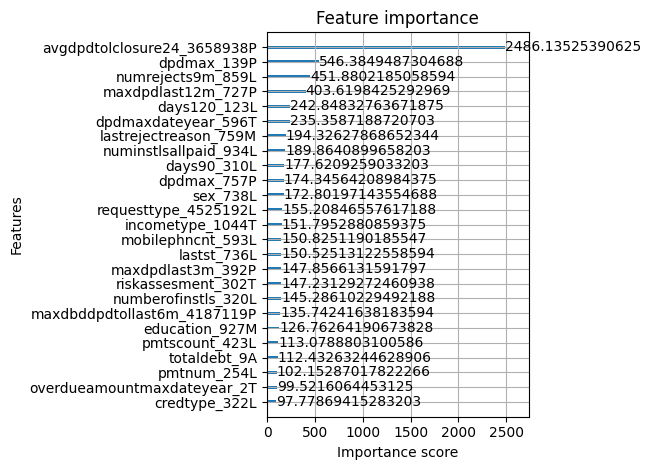

Top 10 Features by Gain:
avgdpdtolclosure24_3658938P: 2486.1353
dpdmax_139P: 546.3849
numrejects9m_859L: 451.8802
maxdpdlast12m_727P: 403.6198
days120_123L: 242.8483
dpdmaxdateyear_596T: 235.3587
lastrejectreason_759M: 194.3263
numinstlsallpaid_934L: 189.8641
days90_310L: 177.6209
dpdmax_757P: 174.3456


In [36]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Downcast Numeric Types
# -----------------------------

# Convert bool to category (optional)
for col in merged.select_dtypes(include='bool').columns:
    merged[col] = merged[col].astype('category')

# Standardize all categorical dtypes
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(ordered=False)
for col in merged.select_dtypes(include='category').columns:
    merged[col] = merged[col].astype(cat_type)

# -----------------------------
# Step 2: Split Data
# -----------------------------
X = merged.drop(columns='target')
y = merged['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Step 3: Create DMatrix with Categorical Support
# -----------------------------
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dvalid = xgb.DMatrix(X_valid, label=y_valid, enable_categorical=True)

# -----------------------------
# Step 4: Train Model
# -----------------------------
params = {
    'tree_method': 'hist',                  # Efficient CPU-based tree builder
    'objective': 'binary:logistic',         # Change to 'reg:squarederror' for regression
    'eval_metric': 'logloss',
    'verbosity': 1
}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=20
)

# -----------------------------
# Step 5: Feature Importance Plot
# -----------------------------
xgb.plot_importance(model, importance_type='gain', max_num_features=25)
plt.tight_layout()
plt.show()

# Optional: get raw importances
importances = model.get_score(importance_type='gain')
sorted_importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))

# Print top 10 important features
print("Top 10 Features by Gain:")
for feature, score in list(sorted_importances.items())[:10]:
    print(f"{feature}: {score:.4f}")


In [33]:
from pyspark.sql import SparkSession
import os
os.environ["JAVA_HOME"] = "/sw-eb/software/Java/17.0.6"  # Replace with your actual path


# Create Spark session
spark = SparkSession.builder \
    .appName("MyNotebookSession") \
    .getOrCreate()

Picked up _JAVA_OPTIONS: -Xmx2048m
Picked up _JAVA_OPTIONS: -Xmx2048m
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/19 19:57:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [35]:
spark.stop()

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[164]	valid_0's binary_logloss: 0.114449
Top 10 Features by Gain:
                         feature          gain  split
144      registaddr_zipcode_184M  76379.249598   1126
129        contaddr_zipcode_807M  59026.014536    934
205  avgdpdtolclosure24_3658938P  45187.220095      9
14                   dpdmax_139P  21619.662121     19
143    registaddr_district_1083M  18011.607395    281
126        contaddr_district_15M  14827.854277    231
134        empladdr_zipcode_114M  13157.978800    251
344              age_at_decision  12732.571878     54
334                  price_1097A  12239.992508     57
18           dpdmaxdateyear_596T  11102.059776     32


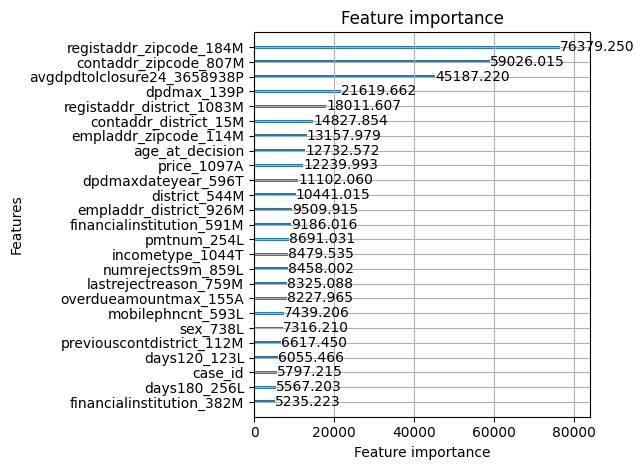

In [40]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# -----------------------------
# Step 1: Optional - Preprocess Categories
# -----------------------------
# Convert bools to categories
for col in merged.select_dtypes(include='bool').columns:
    merged[col] = merged[col].astype('category')

# Standardize all categorical types
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(ordered=False)
for col in merged.select_dtypes(include='category').columns:
    merged[col] = merged[col].astype(cat_type)

# -----------------------------
# Step 2: Split Data
# -----------------------------
X = merged.drop(columns='target')
y = merged['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Step 3: Create LightGBM Datasets
# -----------------------------
train_set = lgb.Dataset(X_train, label=y_train, categorical_feature='auto')
valid_set = lgb.Dataset(X_valid, label=y_valid, reference=train_set)

# -----------------------------
# Step 4: Set Parameters and Train
# -----------------------------
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'verbose': -1
}

# Use early_stopping via callback (compatible with all versions)
model = lgb.train(
    params,
    train_set,
    valid_sets=[valid_set],
    callbacks=[lgb.early_stopping(stopping_rounds=20)],
    num_boost_round=1000
)

# -----------------------------
# Step 5: Feature Importance (Raw)
# -----------------------------
importance_gain = model.feature_importance(importance_type='gain')
importance_split = model.feature_importance(importance_type='split')
feature_names = model.feature_name()

importance_df = pd.DataFrame({
    'feature': feature_names,
    'gain': importance_gain,
    'split': importance_split
}).sort_values(by='gain', ascending=False)

# Display top 10 features
print("Top 10 Features by Gain:")
print(importance_df.head(10))

# -----------------------------
# Step 6: Feature Importance Plot
# -----------------------------
lgb.plot_importance(model, importance_type='gain', max_num_features=25)
plt.tight_layout()
plt.show()


